In [38]:
import ruptures as rpt
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from utils.waves import WaveGenerator

In [40]:
#generate an example wave as a sequence of single notes
amplitude = 0.25
frequency = 92.5
sr = 48000
secs = 1/64
noise = 0.05

frequencies = [146,155,118,205,98]
times = [1,0.5,3,1,0.5]


wave_gen = WaveGenerator(sr=48000)
song1_wave = wave_gen.gen_sequence('sine',frequencies, times, noise_sd=noise, amplitude=1, x_intercept=0)[:, 0]



#split the full wave into chunks of time length 1/64 seconds.
chunk_size = int(secs*sr)
chunks = np.stack([song1_wave[i*chunk_size:i*chunk_size+chunk_size] for i in range(int(len(song1_wave)/chunk_size))])
chunks.shape

(384, 750)

In [41]:
#load a model from the NN training
from tensorflow.keras.models import load_model
model = load_model('../models/note_detect.h5', compile=False)

In [42]:
#using the model predict note from each chunk
y_preds = model.predict(chunks).flatten()
y_preds

array([133.81378 , 142.56374 , 137.6888  , 137.9308  , 131.01756 ,
       144.76376 , 138.2905  , 137.7349  , 134.9583  , 141.05307 ,
       139.39749 , 138.9054  , 154.08669 , 134.88379 , 135.92177 ,
       134.97298 , 140.94693 , 135.89331 , 135.30067 , 143.02164 ,
       138.5217  , 132.92677 , 135.50902 , 146.12228 , 132.84183 ,
       136.10777 , 152.5821  , 144.91725 , 141.60399 , 135.38077 ,
       144.78148 , 137.21535 , 138.65694 , 145.21243 , 139.79927 ,
       139.31175 , 132.6027  , 144.12907 , 143.7822  , 139.35213 ,
       134.66466 , 144.36682 , 139.45851 , 137.12935 , 148.28398 ,
       136.29337 , 136.84831 , 134.18178 , 144.195   , 138.1016  ,
       137.66115 , 148.09502 , 137.11656 , 135.34784 , 134.52386 ,
       145.25835 , 134.2322  , 134.88126 , 145.57288 , 142.07712 ,
       141.32079 , 129.10834 , 144.29745 , 137.47182 , 150.45667 ,
       152.07437 , 140.30632 , 148.73898 , 157.17604 , 154.05241 ,
       147.61757 , 150.66177 , 156.7205  , 148.07574 , 151.026

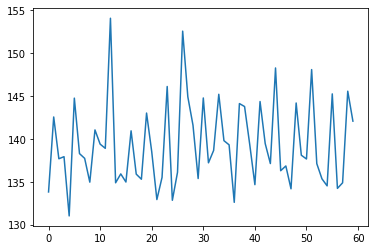

In [43]:
plt.plot(y_preds[:60])

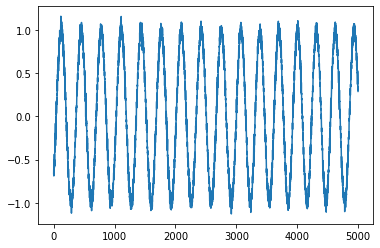

In [44]:
plt.plot(song1_wave[45000:50000])

In [57]:
#estimate the change points between notes
algo_python = rpt.Pelt(model="l2", jump=1, min_size=2).fit(
    y_preds)

penalty_value = 300  # beta discourages a large number of estimated cps
result = algo_python.predict(pen=penalty_value)
print(result)

[64, 96, 288, 352, 384]


In [58]:
print(np.mean(y_preds[:result[0]-1]))
print(np.mean(y_preds[result[0]:result[1]]))


139.32571
148.8124


In [59]:
y_preds[63]

137.47182

(<Figure size 720x144 with 1 Axes>, [<AxesSubplot:>])

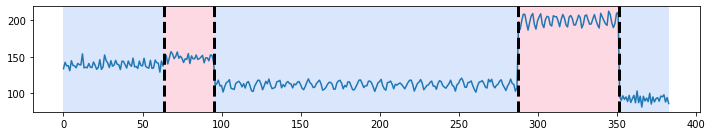

In [60]:
#display the true change points vs the estimated ones.
rpt.display(y_preds, np.cumsum(times)*64, result)
